In [2]:
import pandas as pd
from datetime import datetime
import pylab as plt
import numpy as np
import glob
import os
import sys

### Choose columns and path/file to write csv to

In [15]:
col_names = ['UTC_Start','G_LAT', 'G_LONG', 'G_ALT','O3_UCATS', 'O3e_UCATS']
#col_names = ['UTC_Start','G_LAT', 'G_LONG', 'G_ALT','CH4_PECD','CH4e_PECD'] #methane

outfilepath = r'/shared/netscratch/znjs2/atom_data_02_20/processed/all_atom_o3_data_datetime.csv'

In [4]:
#atom_merged_file = r"/shared/netscratch/znjs2/atom_data_02_20/MER-1HZ_DC8_20160729_R33.ict" #Path to file
#first_line_of_data = pd.read_csv(atom_merged_file, delimiter=',', nrows=1, header=None)
#no_of_rows_to_skip = first_line_of_data[0]
#no_of_rows_to_skip_integer = no_of_rows_to_skip.item() # This code reads the no. of rows to skip
#atom_merged_data = pd.read_csv(atom_merged_file, 
#                               delimiter=',', 
#                               skiprows= no_of_rows_to_skip_integer - 1, 
#                               na_values = [-99999, -9999, -999, -888])

### Read in data

In [5]:
path = r'/shared/netscratch/znjs2/atom_data_02_20' # path to file
all_files = glob.glob(path + "/*.ict")

li = []

for filename in all_files:
    first_line_of_data = pd.read_csv(filename, delimiter=',', nrows=1, header=None)
    no_of_rows_to_skip = first_line_of_data[0]
    no_of_rows_to_skip_integer = no_of_rows_to_skip.item()
    df = pd.read_csv(filename,delimiter=',', 
                     skiprows= no_of_rows_to_skip_integer - 1,
                     index_col=0, 
                     parse_dates=[0],
                     usecols=col_names,
                    na_values='-99999.0')
    #extract start date from filename
    date = filename[53:61]
    datestring = f'{date[0:4]}-{date[4:6]}-{date[6:8]}'
    #convert to datetime
    df['UTC_Start_dt']=pd.to_datetime(df.index, unit='s',  origin = datestring)
    df.index = df['UTC_Start_dt']
    
    #print(df.shape[1])
    li.append(df)

frame = pd.concat(li, axis=0)

/home/znjs2/.conda/envs/basemap/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: `item` has been deprecated and will be removed in a future version
  if __name__ == '__main__':


In [ ]:
frame = frame.drop(['UTC_Start_dt'], axis=1)

In [10]:
print(frame[:3])

                        G_LAT     G_LONG  G_ALT  O3_UCATS  O3e_UCATS
UTC_Start_dt                                                        
2017-10-27 18:24:34  61.17635 -150.00177  143.0      34.1        1.8
2017-10-27 18:24:35  61.17567 -150.00139  154.1       NaN        NaN
2017-10-27 18:24:36  61.17499 -150.00101  165.9      35.3        1.9


In [16]:
#write to csv
frame.to_csv(outfilepath)

### Visualise data over time

Text(0, 0.5, 'O3_UCATS')

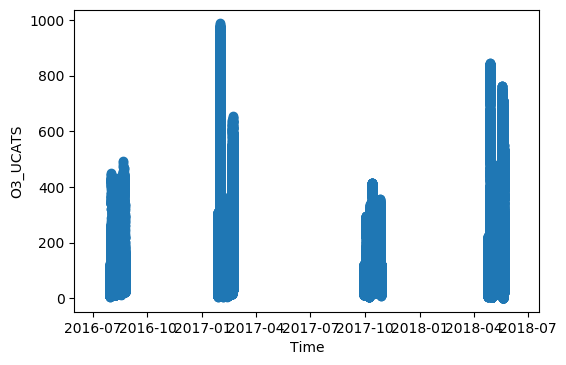

In [14]:
fig = plt.figure(dpi=100)
ax = plt.axes()
x = list(range(len(frame)))
ax.scatter(frame.index, frame.iloc[:,3])
plt.xlabel('Time')
plt.ylabel(f'{frame.columns[3]}')